# Baseline Models Comparison

**Purpose:** Establish naive baselines to understand how good our model accuracy really is.

**Baselines to Test:**
1. Random Guessing
2. Most Frequent Class (Majority Classifier)
3. Stratified Random (Respect Class Distribution)
4. Same Hour Yesterday (Simple Persistence)
5. Same Hour Last Week
6. Cluster-Specific Most Frequent
7. Hour-Specific Most Frequent

---

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Paths
DATA_PATH = '/content/drive/MyDrive/SU Works/CPSC_5310_Project/saved_data/'

# Load data
print("Loading data...")
train_df = pd.read_parquet(DATA_PATH + 'baseline_training.parquet')
test_df = pd.read_parquet(DATA_PATH + 'baseline_testing.parquet')

print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")

Loading data...
Training set: (233850, 44)
Test set: (39445, 44)


## Explore Target Distribution

In [ ]:
# True test labels
y_test = test_df['revenue_class'].values
n_samples = len(y_test)
n_classes = len(np.unique(y_test))

print(f"Test Set Statistics:")
print(f"Total samples: {n_samples:,}")
print(f"Number of classes: {n_classes}")
print(f"\nClass Distribution (Test Set):")
class_dist = pd.Series(y_test).value_counts().sort_index()
for cls, count in class_dist.items():
    pct = count / n_samples * 100
    print(f"  Class {cls}: {count:,} ({pct:.1f}%)")

Test Set Statistics:
Total samples: 39,445
Number of classes: 5

Class Distribution (Test Set):
  Class 1: 2,753 (7.0%)
  Class 2: 8,705 (22.1%)
  Class 3: 9,755 (24.7%)
  Class 4: 9,462 (24.0%)
  Class 5: 8,770 (22.2%)


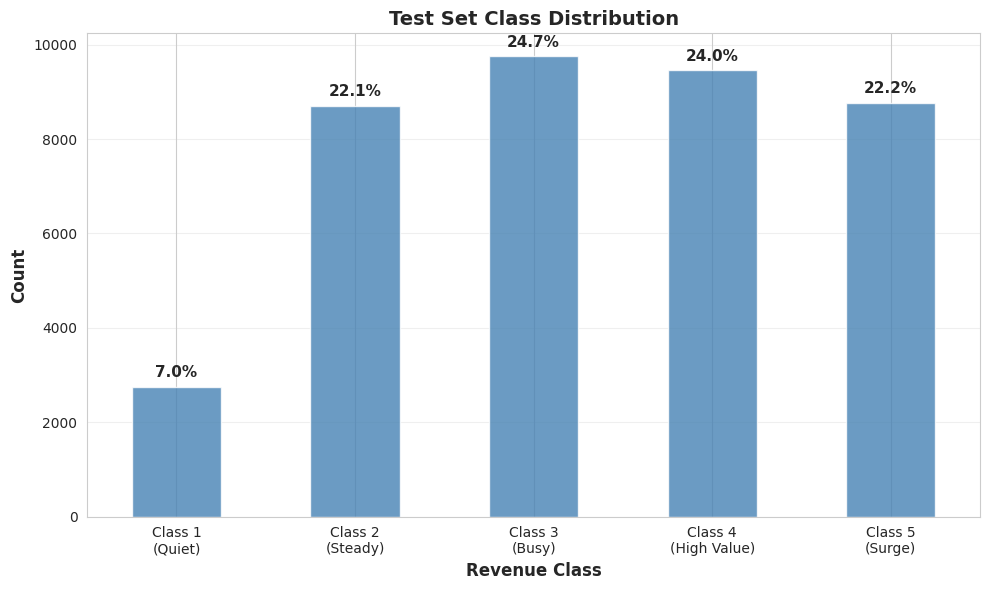

In [ ]:
# Visualize class distribution
fig, ax = plt.subplots(figsize=(10, 6))
class_dist.plot(kind='bar', color='steelblue', alpha=0.8, ax=ax)
ax.set_xlabel('Revenue Class', fontsize=12, weight='bold')
ax.set_ylabel('Count', fontsize=12, weight='bold')
ax.set_title('Test Set Class Distribution', fontsize=14, weight='bold')
ax.set_xticklabels(['Class 1\n(Quiet)', 'Class 2\n(Steady)', 'Class 3\n(Busy)',
                    'Class 4\n(High Value)', 'Class 5\n(Surge)'], rotation=0)
ax.grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (cls, count) in enumerate(class_dist.items()):
    pct = count / n_samples * 100
    ax.text(i, count + 200, f'{pct:.1f}%', ha='center', fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

---

## Baseline 1: Random Guessing (Uniform)

**Strategy:** Randomly guess one of the 5 classes with equal probability (20% each).

In [ ]:
print("="*70)
print("BASELINE 1: RANDOM GUESSING (UNIFORM)")
print("="*70)

# Random predictions (uniform distribution)
np.random.seed(42)
y_pred_random = np.random.choice([1, 2, 3, 4, 5], size=n_samples)

# Calculate accuracy
acc_random = accuracy_score(y_test, y_pred_random)

print(f"\nAccuracy: {acc_random:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_random, zero_division=0))

BASELINE 1: RANDOM GUESSING (UNIFORM)

Accuracy: 19.85%

Classification Report:
              precision    recall  f1-score   support

           1       0.06      0.18      0.10      2753
           2       0.22      0.20      0.21      8705
           3       0.25      0.20      0.22      9755
           4       0.24      0.20      0.22      9462
           5       0.22      0.20      0.21      8770

    accuracy                           0.20     39445
   macro avg       0.20      0.20      0.19     39445
weighted avg       0.22      0.20      0.21     39445



---

## Baseline 2: Most Frequent Class (Majority Classifier)

**Strategy:** Always predict the most common class in the training set.

In [ ]:
print("="*70)
print("BASELINE 2: MOST FREQUENT CLASS (MAJORITY CLASSIFIER)")
print("="*70)

# Find most frequent class in training set
most_frequent_class = train_df['revenue_class'].mode()[0]
print(f"\nMost frequent class in training: {most_frequent_class}")

# Predict always the most frequent class
y_pred_majority = np.full(n_samples, most_frequent_class)

# Calculate accuracy
acc_majority = accuracy_score(y_test, y_pred_majority)

print(f"\nAccuracy: {acc_majority:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_majority, zero_division=0))

BASELINE 2: MOST FREQUENT CLASS (MAJORITY CLASSIFIER)

Most frequent class in training: 5

Accuracy: 22.23%

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2753
           2       0.00      0.00      0.00      8705
           3       0.00      0.00      0.00      9755
           4       0.00      0.00      0.00      9462
           5       0.22      1.00      0.36      8770

    accuracy                           0.22     39445
   macro avg       0.04      0.20      0.07     39445
weighted avg       0.05      0.22      0.08     39445



---

## Baseline 3: Stratified Random

**Strategy:** Randomly guess, but respect the class distribution from training set.

In [ ]:
print("="*70)
print("BASELINE 3: STRATIFIED RANDOM")
print("="*70)

# Get class distribution from training
class_probs = train_df['revenue_class'].value_counts(normalize=True).sort_index()
print(f"\nTraining class distribution:")
for cls, prob in class_probs.items():
    print(f"  Class {cls}: {prob:.2%}")

# Random predictions respecting class distribution
np.random.seed(42)
y_pred_stratified = np.random.choice(
    class_probs.index,
    size=n_samples,
    p=class_probs.values
)

# Calculate accuracy
acc_stratified = accuracy_score(y_test, y_pred_stratified)

print(f"\nAccuracy: {acc_stratified:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_stratified, zero_division=0))

BASELINE 3: STRATIFIED RANDOM

Training class distribution:
  Class 1: 11.48%
  Class 2: 21.88%
  Class 3: 21.85%
  Class 4: 22.15%
  Class 5: 22.64%

Accuracy: 21.45%

Classification Report:
              precision    recall  f1-score   support

           1       0.07      0.12      0.09      2753
           2       0.22      0.22      0.22      8705
           3       0.24      0.22      0.23      9755
           4       0.24      0.23      0.24      9462
           5       0.22      0.22      0.22      8770

    accuracy                           0.21     39445
   macro avg       0.20      0.20      0.20     39445
weighted avg       0.22      0.21      0.22     39445



---

## Baseline 4: Same Hour Yesterday (Temporal Persistence)

**Strategy:** Use the revenue class from 24 hours ago as the prediction.

In [ ]:
print("="*70)
print("BASELINE 4: SAME HOUR YESTERDAY")
print("="*70)

# Create a combined dataframe to track temporal relationships
# Add training and test data together temporarily
train_df['split'] = 'train'
test_df['split'] = 'test'
combined = pd.concat([train_df, test_df], ignore_index=True)

# Sort by cluster and timestamp
combined = combined.sort_values(['pickup_cluster', 'timestamp'])

# Create lag-24 prediction (24 hours ago)
combined['yesterday_class'] = combined.groupby('pickup_cluster')['revenue_class'].shift(24)

# Extract test set predictions
test_with_pred = combined[combined['split'] == 'test'].copy()

# Remove rows where we don't have yesterday's data (first 24 hours of test)
test_with_pred_valid = test_with_pred.dropna(subset=['yesterday_class'])

y_test_valid = test_with_pred_valid['revenue_class'].values
y_pred_yesterday = test_with_pred_valid['yesterday_class'].values.astype(int)

# Calculate accuracy
acc_yesterday = accuracy_score(y_test_valid, y_pred_yesterday)

print(f"\nValid samples: {len(y_test_valid):,} (out of {n_samples:,})")
print(f"Missing samples: {n_samples - len(y_test_valid):,} (first 24 hours per cluster)")
print(f"\nAccuracy: {acc_yesterday:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test_valid, y_pred_yesterday, zero_division=0))

BASELINE 4: SAME HOUR YESTERDAY

Valid samples: 39,445 (out of 39,445)
Missing samples: 0 (first 24 hours per cluster)

Accuracy: 64.33%

Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.53      0.54      2753
           2       0.64      0.63      0.64      8705
           3       0.59      0.60      0.59      9755
           4       0.61      0.62      0.61      9462
           5       0.78      0.76      0.77      8770

    accuracy                           0.64     39445
   macro avg       0.63      0.63      0.63     39445
weighted avg       0.64      0.64      0.64     39445



---

## Baseline 5: Same Hour Last Week

**Strategy:** Use the revenue class from 168 hours ago (7 days $\times$ 24 hours).


In [ ]:
print("="*70)
print("BASELINE 5: SAME HOUR LAST WEEK")
print("="*70)

# Create lag-168 prediction (7 days ago)
combined['last_week_class'] = combined.groupby('pickup_cluster')['revenue_class'].shift(168)

# Extract test set predictions
test_with_pred = combined[combined['split'] == 'test'].copy()

# Remove rows where we don't have last week's data
test_with_pred_valid = test_with_pred.dropna(subset=['last_week_class'])

y_test_valid = test_with_pred_valid['revenue_class'].values
y_pred_last_week = test_with_pred_valid['last_week_class'].values.astype(int)

# Calculate accuracy
acc_last_week = accuracy_score(y_test_valid, y_pred_last_week)

print(f"\nValid samples: {len(y_test_valid):,} (out of {n_samples:,})")
print(f"Missing samples: {n_samples - len(y_test_valid):,} (first week per cluster)")
print(f"\nAccuracy: {acc_last_week:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test_valid, y_pred_last_week, zero_division=0))

BASELINE 5: SAME HOUR LAST WEEK

Valid samples: 39,445 (out of 39,445)
Missing samples: 0 (first week per cluster)

Accuracy: 65.44%

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.54      0.51      2753
           2       0.66      0.64      0.65      8705
           3       0.61      0.59      0.60      9755
           4       0.63      0.63      0.63      9462
           5       0.77      0.80      0.79      8770

    accuracy                           0.65     39445
   macro avg       0.63      0.64      0.64     39445
weighted avg       0.65      0.65      0.65     39445



---

## Baseline 6: Cluster-Specific Most Frequent

**Strategy:** For each cluster, predict its most frequent class from training.

In [ ]:
print("="*70)
print("BASELINE 6: CLUSTER-SPECIFIC MOST FREQUENT")
print("="*70)

# Calculate most frequent class per cluster in training
cluster_mode = train_df.groupby('pickup_cluster')['revenue_class'].agg(lambda x: x.mode()[0])
print(f"\nCalculated most frequent class for {len(cluster_mode)} clusters")

# Create predictions by mapping cluster to its most frequent class
test_df_copy = test_df.copy()
y_pred_cluster = test_df_copy['pickup_cluster'].map(cluster_mode).values

# Handle any clusters not seen in training (unlikely but possible)
if np.any(pd.isna(y_pred_cluster)):
    print(f"Warning: {pd.isna(y_pred_cluster).sum()} clusters not in training, using global mode")
    global_mode = train_df['revenue_class'].mode()[0]
    y_pred_cluster[pd.isna(y_pred_cluster)] = global_mode

# Calculate accuracy
acc_cluster = accuracy_score(y_test, y_pred_cluster)

print(f"\nAccuracy: {acc_cluster:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_cluster, zero_division=0))

BASELINE 6: CLUSTER-SPECIFIC MOST FREQUENT

Calculated most frequent class for 150 clusters

Accuracy: 50.43%

Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.42      0.48      2753
           2       0.60      0.47      0.53      8705
           3       0.46      0.37      0.41      9755
           4       0.43      0.51      0.46      9462
           5       0.54      0.71      0.62      8770

    accuracy                           0.50     39445
   macro avg       0.52      0.50      0.50     39445
weighted avg       0.51      0.50      0.50     39445



---

## Baseline 7: Hour-Specific Most Frequent

**Strategy:** For each hour of day, predict its most frequent class from training.

In [ ]:
print("="*70)
print("BASELINE 7: HOUR-SPECIFIC MOST FREQUENT")
print("="*70)

# Calculate most frequent class per hour in training
hour_mode = train_df.groupby('hour')['revenue_class'].agg(lambda x: x.mode()[0])
print(f"\nMost frequent class by hour:")
for hour, cls in hour_mode.items():
    print(f"  Hour {hour:2d}: Class {cls}")

# Create predictions by mapping hour to its most frequent class
y_pred_hour = test_df['hour'].map(hour_mode).values

# Calculate accuracy
acc_hour = accuracy_score(y_test, y_pred_hour)

print(f"\nAccuracy: {acc_hour:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_hour, zero_division=0))

BASELINE 7: HOUR-SPECIFIC MOST FREQUENT

Most frequent class by hour:
  Hour  0: Class 2
  Hour  1: Class 2
  Hour  2: Class 2
  Hour  3: Class 2
  Hour  4: Class 2
  Hour  5: Class 3
  Hour  6: Class 3
  Hour  7: Class 4
  Hour  8: Class 4
  Hour  9: Class 4
  Hour 10: Class 4
  Hour 11: Class 4
  Hour 12: Class 4
  Hour 13: Class 5
  Hour 14: Class 4
  Hour 15: Class 4
  Hour 16: Class 5
  Hour 17: Class 5
  Hour 18: Class 5
  Hour 19: Class 5
  Hour 20: Class 5
  Hour 21: Class 5
  Hour 22: Class 5
  Hour 23: Class 2

Accuracy: 35.92%

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2753
           2       0.42      0.47      0.44      8705
           3       0.39      0.13      0.20      9755
           4       0.31      0.44      0.37      9462
           5       0.35      0.53      0.42      8770

    accuracy                           0.36     39445
   macro avg       0.30      0.31      0.29     3944

---

## Baseline 8: Cluster + Hour Most Frequent

**Strategy:** For each (cluster, hour) combination, predict its most frequent class from training.

In [ ]:
print("="*70)
print("BASELINE 8: CLUSTER + HOUR MOST FREQUENT")
print("="*70)

# Calculate most frequent class per (cluster, hour) combination
cluster_hour_mode = train_df.groupby(['pickup_cluster', 'hour'])['revenue_class'].agg(
    lambda x: x.mode()[0] if len(x) > 0 else 3  # Default to class 3 if no data
)

print(f"\nCalculated modes for {len(cluster_hour_mode)} (cluster, hour) combinations")

# Create predictions by mapping (cluster, hour) to most frequent class
test_df_copy = test_df.copy()
test_df_copy['cluster_hour'] = list(zip(test_df_copy['pickup_cluster'], test_df_copy['hour']))
y_pred_cluster_hour = test_df_copy['cluster_hour'].map(
    cluster_hour_mode.to_dict()
).values

# Handle any (cluster, hour) combinations not seen in training
if np.any(pd.isna(y_pred_cluster_hour)):
    missing_count = pd.isna(y_pred_cluster_hour).sum()
    print(f"⚠️ {missing_count} (cluster, hour) combinations not in training")

    # Fill with cluster mode if available, otherwise global mode
    for idx in np.where(pd.isna(y_pred_cluster_hour))[0]:
        cluster = test_df_copy.iloc[idx]['pickup_cluster']
        if cluster in cluster_mode:
            y_pred_cluster_hour[idx] = cluster_mode[cluster]
        else:
            y_pred_cluster_hour[idx] = train_df['revenue_class'].mode()[0]

# Calculate accuracy
acc_cluster_hour = accuracy_score(y_test, y_pred_cluster_hour)

print(f"\nAccuracy: {acc_cluster_hour:.2%}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_cluster_hour, zero_division=0))

BASELINE 8: CLUSTER + HOUR MOST FREQUENT

Calculated modes for 3600 (cluster, hour) combinations

Accuracy: 68.91%

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.65      0.66      2753
           2       0.67      0.76      0.71      8705
           3       0.65      0.58      0.61      9755
           4       0.67      0.63      0.65      9462
           5       0.77      0.82      0.80      8770

    accuracy                           0.69     39445
   macro avg       0.69      0.69      0.69     39445
weighted avg       0.69      0.69      0.69     39445



---

## Summary: All Baselines vs Your Model

In [ ]:
# Compile results
results = {
    'Baseline': [
        '1. Random Guessing',
        '2. Most Frequent Class',
        '3. Stratified Random',
        '4. Same Hour Yesterday',
        '5. Same Hour Last Week',
        '6. Cluster-Specific Mode',
        '7. Hour-Specific Mode',
        '8. Cluster+Hour Mode',
    ],
    'Accuracy': [
        acc_random,
        acc_majority,
        acc_stratified,
        acc_yesterday,
        acc_last_week,
        acc_cluster,
        acc_hour,
        acc_cluster_hour,
    ]
}

results_df = pd.DataFrame(results)
results_df['Improvement vs Random'] = (results_df['Accuracy'] / acc_random - 1) * 100

print("\n" + "="*80)
print("BASELINE COMPARISON SUMMARY")
print("="*80)
print()
print(results_df.to_string(index=False))
print()
print("="*80)


BASELINE COMPARISON SUMMARY

                Baseline  Accuracy  Improvement vs Random
      1. Random Guessing  0.198504               0.000000
  2. Most Frequent Class  0.222335              12.005109
    3. Stratified Random  0.214476               8.045977
  4. Same Hour Yesterday  0.643275             224.061303
  5. Same Hour Last Week  0.654354             229.642401
6. Cluster-Specific Mode  0.504348             154.074074
   7. Hour-Specific Mode  0.359234              80.970626
    8. Cluster+Hour Mode  0.689137             247.164751

